# Toyota_used_car_ML

Md Asifuzzaman
<br>BSc in Statistics, Dhaka College affiliated to the University of Dhaka
<br>The objective of this project is to perform the basic analysis, EDA, predict the model and compare the performance of that model. 
<br>The dataset is collected from __Kaggle__.

__Objective__ 
1. Data Analysis using NumPy and Pandas
2. Familiarity with matplotlib and seaborn
3. Brief description about dataset
4. Data visualization with Barplot, Scatter plot, Histogram, Distribution, Boxplot and ecdf
5. Check missing values and check rows and column's information 
6. Perform data preprocessing
7. EDA using groupby 
8. Barplot based on model, transmission, and fuelType
9. Predict the price using ML method 

__References__
<br>Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw


## Brief description about dataset

In [1]:
# required libraries for data analysis
import pandas as pd
import numpy as np

# required libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_context("talk")
sns.set_style("darkgrid")

## Dataset information
The data set contains information of price, transmission, mileage, fuel type, year, model, miles per gallon (mpg), and engineSize.
#### Target Variable:
__price:__ Selling price of the cars
#### Features:
1. __model:__ list of the Ford cars
2. __year:__ when the car was made
3. __transmission:__ transmission adapts the output of the internal combustion engine to the drive wheels
4. __mileage:__ the mileage of a vehicle is the number of miles that it can travel using one gallon or litre of fuel
5. __fuelType:__ different fuels a vehicle may use 
6. __mpg:__ miles per gallon the vehicle can travel
7. __engineSize:__ engine size is the volume of fuel and air that can be pushed through a car's cylinders
    

### Loading the dataset

In [2]:
# import the data
# read a csv file as pandas DataFrame
df = pd.read_csv("toyota.csv")

# check the first 5 rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Check for missing values and data types of the columns

In [3]:
# Let's walk towards the details of this dataframe.
# Let's check the no. of rows and columns
print("shape of this dataframe : " + str(df.shape))
df.info()

shape of this dataframe : (6738, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


#### Findings
- Number of rows: 6738
- Number of columns: 8
- The dataset has no missing value.

### Descriptive statistics for numerical columns in the dataset

In [4]:
# Let's try to undestand the numerical columns of the dataset
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


#### From above analysis, we can conclude that
-  The oldest car in the dataset is from 1996 and latest is from 2020
-  The average price of the used cars is \$12522 
-  The highest and lowest price of the used cars are \\$59995 and \$850
-  The lowest mileage is 2 miles and highest mileage is 174419 miles
-  The highest mpg is 235
-  The Engine Size varies from 0 to 4.5

### Data Preprocessing

In [5]:
# Now we will do some cleaning of the data. First, we will check for None values.
df.isnull().values.any()

False

#### Findings
- There is no null values in this dataset.

### Create a function to find the number of obsevations for unique value in a column of a DataFrame

In [6]:
def unique_percent_count(data, col):
    # Count the number of unique values present in the respective column
    col_count = data[col].value_counts(normalize = True)
    # Find the percentage of unique values present in the respective column
    col_count = col_count*100
    # Change the type of variable from <class 'pandas.core.series.Series'> to DataFrame
    col_count = pd.DataFrame(col_count)
    # Reset index
    col_count = col_count.reset_index()
    # Rename the columns
    col_count = col_count.rename(columns={'index':col, col:'% of cars'})
    # Display the two digit after decimal point
    col_count['% of cars'] = col_count['% of cars'].round(2)

    return col_count

### Display the number of obsevations for unique value in a column of a DataFrame by calling above function

In [7]:
fuelType_count = unique_percent_count(df, "fuelType")
transmission_count = unique_percent_count(df, "transmission")
model_count = unique_percent_count(df, "model")
year_count = unique_percent_count(df, "year")
year_count = year_count.sort_values(by = 'year')

## Analysis with Barplot

### Create a function to show the number of observations for each unique value in a column by using a Barplot

In [8]:
def barplot(data, x_col, color, yticks, rotation):
    # data will be the name of the dataframe
    # x_col is the column that will go in the x-axis
    # yticks will be the range/bins/class-interval of y-axis
    # rotation is to rotate the labels
    
    # create a barplot by using seaborn 
    sns.barplot(x=x_col, y='% of cars', data=data, color =color, alpha=0.75)
    # Name each subplot of barplot
    plt.title("Percentage of cars present for each " + x_col)
    # Perform manual changes in yticks & xticks
    
    # lebel for the x and y axis
    plt.xlabel(x_col)
    plt.ylabel("Percent of cars (%)")
    # Provide a range for the yticks. yticks will be different for each DataFrame 
    plt.yticks(yticks)
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)

### Display a figure of barplot that contains multiple subplots by calling above barplot function

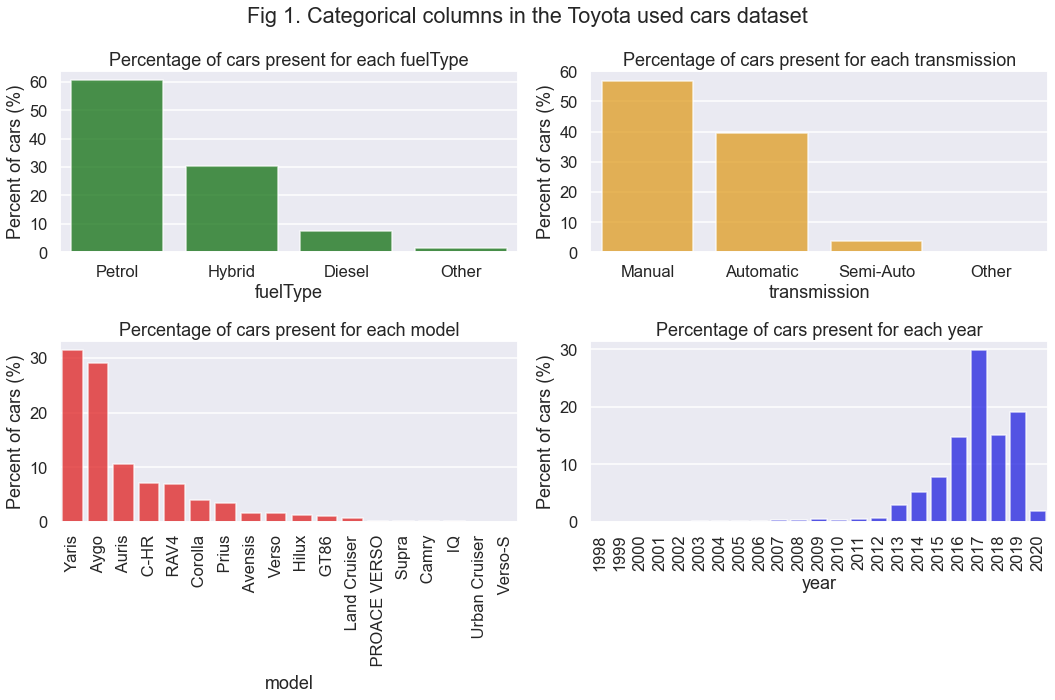

In [9]:
# Set the layout of graphs. Other options are "book" & "paper"
sns.set_context("talk")
# Set the size of the graph (Width, Length/Height)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
barplot(fuelType_count,"fuelType", "green",np.arange(0,70,10), 0)

plt.subplot(2,2,2)
barplot(transmission_count,"transmission", "orange",np.arange(0,70,10), 0)

plt.subplot(2,2,3)
barplot(model_count, "model", "red", np.arange(0,40,10), 90)

plt.subplot(2,2,4)
barplot(year_count, "year", "blue", np.arange(0,40,10), 90)

plt.suptitle('Fig 1. Categorical columns in the Toyota used cars dataset')

plt.tight_layout()
plt.show()

#### Findings from Fig 1.
These bar plot is showing clear idea to make a comparison of the cars with the different categories.
<br> 1. __fuelType Subplot:__ This subplot is informing generally people use __Petrol__ as their car's fuel.
<br> 2. __transmission Subplot:__ This subplot is indicating more than 50% cars' transmission are __manual__.
<br> 3. __model Subplot:__ This plot shows __Yaris__ model cars have the most in number and more than 30% of total.
<br> 4. __year Subpolt:__ This subplot is saying most of the cars have built in 2017 year. The second higest cars have build is in 2019. COVID-19 may cause of the large number of production decression of the year 2020.

## Analysis with Scatter plot 

### Create a function to show scatterplot with numeric columns

In [10]:
def scatter_plot(data, x_col, y_col, hue):
    # data will be the name of the dataframe
    # x_col is the column that will go in the x-axis
    #
    
    # create a scatter plot by using seaborn & plot the parameters accordingly
    sns.scatterplot(x=x_col, y = y_col, data=data, hue =hue)
    # Give proper title for scatter plot
    plt.title('Fig 2. '+x_col+' vs '+y_col +' scatter_plot')

### Display scatter plot using scatterplot function

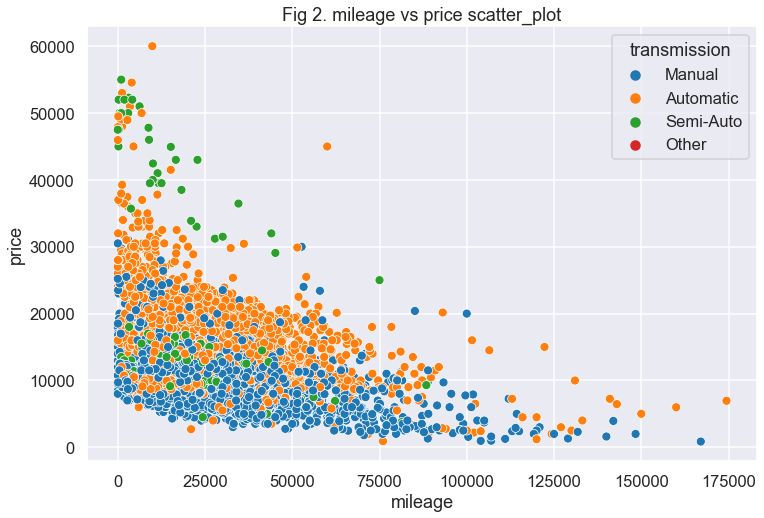

In [11]:
plt.figure(figsize=(12,8))
scatter_plot(df, 'mileage', 'price', 'transmission')

plt.show()

#### Findings from Fig 2. 
The scatter plot shows the comparison between __mileage vs price__ with respect to __transmission__.
<br>1. This scatter plot informed that __Semi-Auto__ cars are most expensive in the most cases with __Automatic__ cars also sometimes.
<br>2. __Manual__ cars are not so costly.
<br>3. Prices are decreasing gradually when Mileages are increasing.



## Analysis with Histogram

### Create a function to show Histogram with numeric columns

In [12]:
def histogram(data, x_col, binwidth):      
    sns.histplot(x=x_col, binwidth= binwidth, data=data)

### Display histogram using histogram function

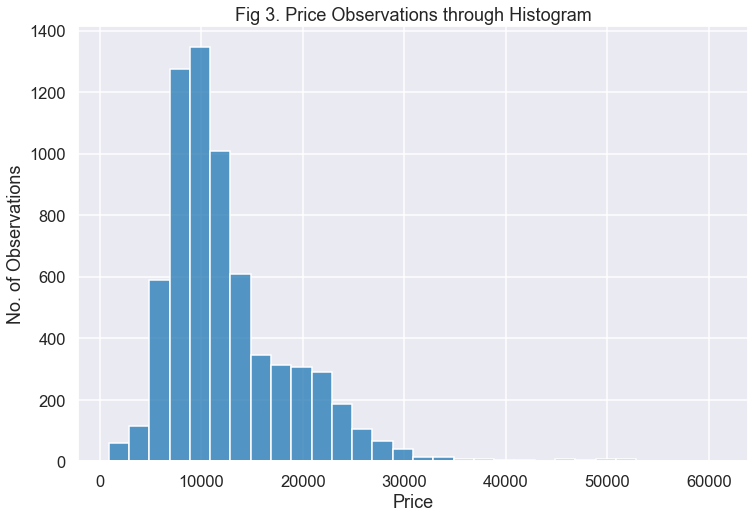

In [13]:
sns.set_context("talk")
plt.figure(figsize=(12,8))
histogram(df, 'price', 2000) 
plt.xlabel('Price')
plt.ylabel('No. of Observations')
plt.title("Fig 3. Price Observations through Histogram")
plt.show()

#### Findings from Fig 3.
1. This histogram shows the number of observations in-terms of price. 
2. Mostly, the price of used Toyota cars lies between 5000 to 20000 USD.
3. This histogram shows cars' sell is gradually decreasing when price is increasing.

## Analysis with ECDF Plot

### Create a function to show ECDF plot with numeric columns

In [14]:
def ECDF(data, x_col, binwidth, stat):
    sns.histplot(x=x_col, binwidth= binwidth, data=data, stat=stat, cumulative=True)

### Display ECDF plot using ECDF function

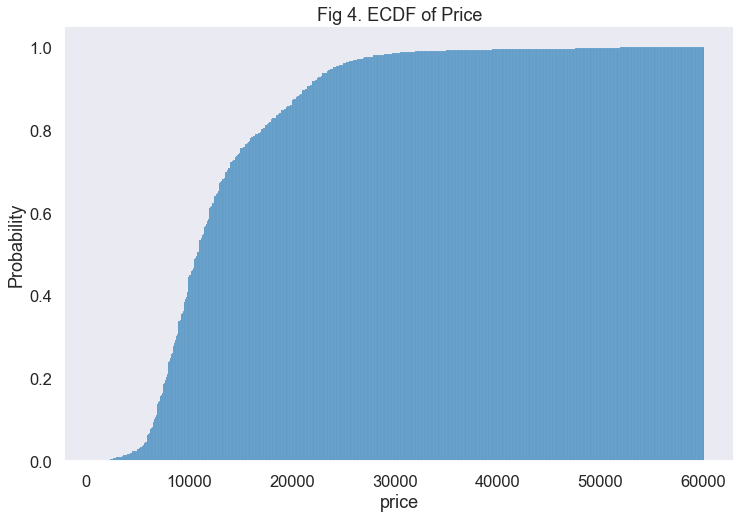

In [15]:
plt.figure(figsize=(12, 8))
ECDF(df,'price',75, 'probability')

plt.grid()
plt.title("Fig 4. ECDF of Price")
plt.show()

#### Remarks
Fig 4. displays the emprical cumulative distribution of price of used Toyota cars.The graph shows the probability of occurrence of the price at a given place. For example, the probability of price being less than or equal to 20000 is approximately 0.6

## Analysis with Distribution Plot

### Create a function to show distribution plot with numeric columns

In [16]:
def distribution_plot(df, x_col):
    column = pd.Series(df[x_col], name=x_col)
    column = sns.distplot(column, rug=True, hist=False)
    return column

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


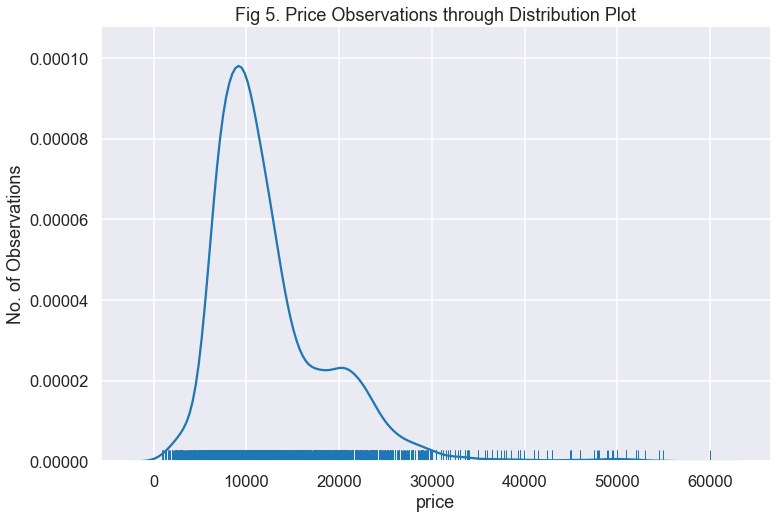

In [17]:
plt.figure(figsize=(12,8))
distribution_plot(df, "price") 
plt.ylabel('No. of Observations')
plt.title("Fig 5. Price Observations through Distribution Plot")
plt.show()

#### Findings from Fig 5.
1. The distribution of price is positively skewed. 
2. Mostly, the price of used Toyota cars lies between 5000 to 20000 USD

## Analysis with Boxplot

### Create a function to show boxplot

In [18]:
def box_plot(x_col, y_col, data, yticks, hue):
    sns.boxplot(x=x_col, y=y_col, data=data, showfliers=False)
    
    plt.yticks(yticks)

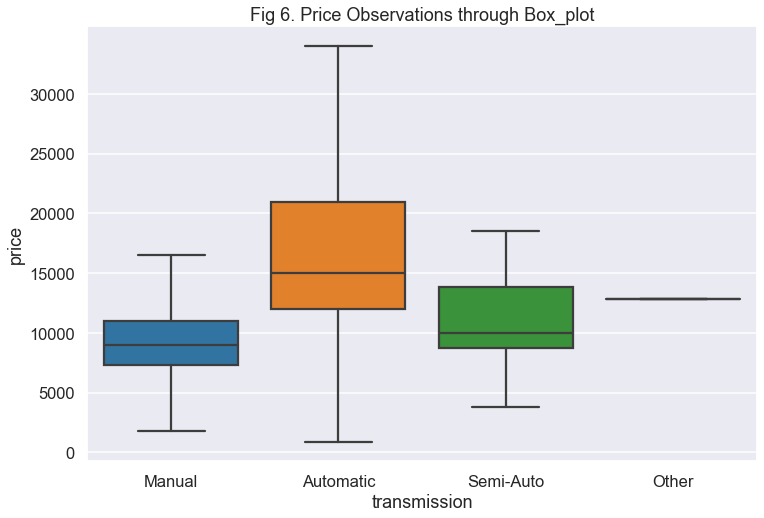

In [19]:
plt.figure(figsize=(12,8))
box_plot("transmission", "price", df, np.arange(0,35000,5000), None)

plt.title("Fig 6. Price Observations through Box_plot")
plt.show()

#### Findings from Fig 6.
1. The price of Automatic car is in high range with respect to Semi-Auto and Manual.
2. The price of Semi-Auto car is mostly in medium range.
3. The price of Manual car is in low-medium range comparatively.

### Check the number of unique values in the 'model' column

In [20]:
print(df['model'].unique())

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


### Data aggregation of 'model' column

In [21]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011
Corolla,267,20942.734082,5591710
GT86,73,19908.849315,1453346
Hilux,86,21504.593023,1849395
IQ,8,4247.250000,33978


Based on model
- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

### Data preprocessing before visualization

In [22]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


__Answer of the above questions are below__
- The top 5 selling car models in the datasets are 1. Yaris 2. Aygo 3. Auris 4. C-HR 5. RAV4
- The average selling prices of the top 5 selling car models are __1.__\$10553.08  __2.__ \\$7905.41  __3.__ \\$12507.91  __4.__ \\$20651.54  __5.__ \\$18161.06
- The total sale of the top 5 selling car models are __1.__ \$22.39   __2.__\\$15.50  __3.__\\$8.91 __4.__\\$9.89 __5.__\\$8.59 in million

### Barplot: Percentage of cars, Average and Total selling price of cars by model

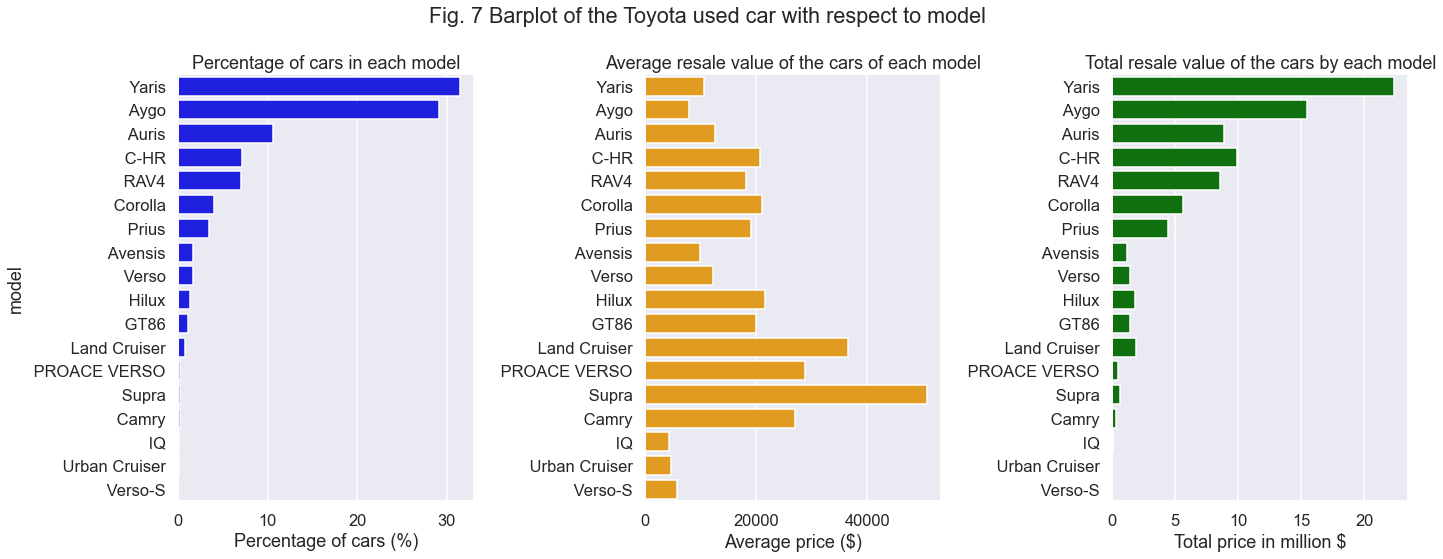

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")


plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Fig. 7 Barplot of the Toyota used car with respect to model")
plt.tight_layout()
plt.show()

#### Findings from Fig. 7
- Yaris & Aygo were sold around 30% individually.
- The Average resale value of Supra is highest & around \$48
- Yaris has the highest total resale value  

### Data aggregation of 'transmission' column

In [24]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


### Data preprocessing before visualization

In [25]:
# sort the dataframe based on the column 'count'
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each transmission
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission)

,mean,sum,percent_of_cars
transmission,,,
Manual,9551.50,36.54,56.78
Automatic,16582.83,44.06,39.43
Semi-Auto,14797.14,3.76,3.77
Other,12795.00,0.01,0.01


### Barplot: Percentage of cars, Average and Total selling price of cars by transmission	

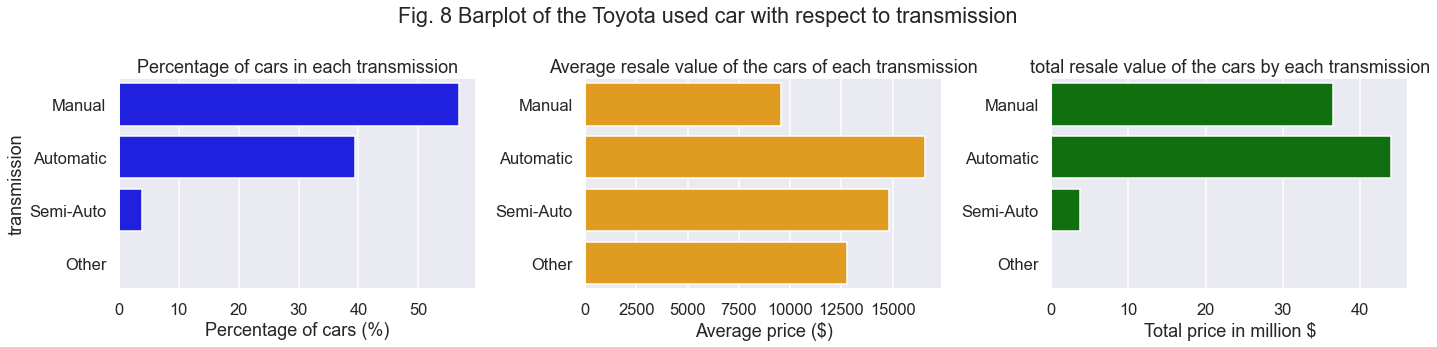

In [26]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")


plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Fig. 8 Barplot of the Toyota used car with respect to transmission")
plt.tight_layout()
plt.show()

### Data aggregation of 'fuelType' column

In [27]:
df_agg_fuelType = df.groupby('fuelType')['mileage'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,503,41742.294235,20996374
Hybrid,2043,24452.267744,49955983
Other,105,17159.904762,1801790
Petrol,4087,19882.336188,81259108


### Data preprocessing before visualization

In [28]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each fuelType
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType)

,mean,sum,percent_of_cars
fuelType,,,
Petrol,19882.34,81.26,60.66
Hybrid,24452.27,49.96,30.32
Diesel,41742.29,21.00,7.47
Other,17159.90,1.80,1.56


### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType

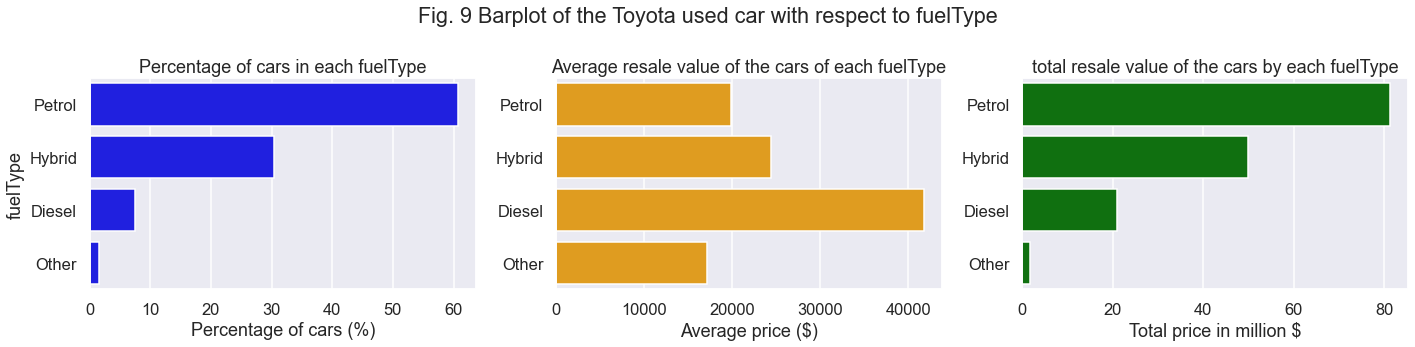

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")


plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Fig. 9 Barplot of the Toyota used car with respect to fuelType")
plt.tight_layout()
plt.show()

### Separating the features and target variable

In [30]:
features = ['mileage', 'year', 'tax', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(6738, 5) (6738, 1)


### Create train and test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5390, 5) (1348, 5) (5390, 1) (1348, 1)


### Linear Regression

In [32]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Prediction

In [33]:
y_pred = model.predict(X_test)

In [34]:
print(y_pred)

[[27458.04754612]
 [ 1863.14958146]
 [12878.805698  ]
 ...
 [14217.063431  ]
 [ 7888.97935003]
 [ 8750.44363207]]


### Prediction Error

In [35]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

3156.3740503587087
